In [18]:
!pip install mtcnn

In [19]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


Import libraries

In [20]:
import numpy as np
import pandas as pd
import cv2
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image,UnidentifiedImageError
import os

See a sample image

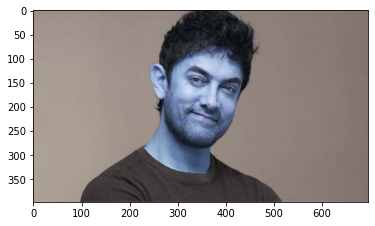

(398, 696, 3)


In [21]:
img = cv2.imread('../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan/104.jpg')
plt.imshow(img)
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

In [22]:
# extract a single face from a given photograph

def extract_face(filename, required_size=(160, 160)):
    # load image from file
    try:
        image = Image.open(filename)
    except UnidentifiedImageError:
        return 0
    else:
        # convert to RGB, if needed
        image = image.convert('RGB')
        # convert to array
        pixels = np.asarray(image)
        # create the detector, using default weights
        detector = MTCNN()
        # detect faces in the image
        results = detector.detect_faces(pixels)
        if len(results)>0:
            # extract the bounding box from the first face
            x1, y1, width, height = results[0]['box']
            # deal with negative pixel index
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1 + width, y1 + height
            # extract the face
            face = pixels[y1:y2, x1:x2]
            # resize pixels to the model size
            image = Image.fromarray(face)
            image = image.resize(required_size)
            face_array = np.asarray(image)
        else:
            face_array = 0
        return face_array



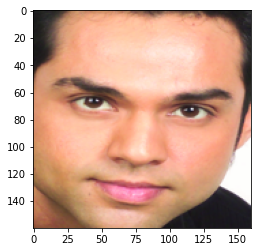

[[[ 30  30  31]
  [ 29  32  31]
  [ 28  31  28]
  ...
  [ 55  59  58]
  [ 54  54  58]
  [ 46  47  48]]

 [[ 30  28  32]
  [ 33  31  34]
  [ 32  33  32]
  ...
  [ 47  45  49]
  [ 50  50  51]
  [ 51  53  50]]

 [[ 28  26  30]
  [ 28  27  30]
  [ 29  28  30]
  ...
  [ 42  35  42]
  [ 53  54  53]
  [ 57  64  56]]

 ...

 [[145  79  56]
  [152  86  55]
  [157  89  62]
  ...
  [ 27  28  33]
  [ 27  25  30]
  [ 29  27  33]]

 [[137  77  53]
  [144  82  53]
  [149  85  58]
  ...
  [ 27  27  32]
  [ 27  25  31]
  [ 27  28  33]]

 [[127  72  47]
  [131  74  48]
  [136  78  52]
  ...
  [ 27  25  32]
  [ 28  26  32]
  [ 28  27  30]]]
(160, 160, 3)


In [23]:
# load the photo and extract the face
pixels = extract_face('../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Abhay_Deol/20.jpg')
if type(pixels) != int:
    plt.imshow(pixels)
    plt.show()
    print(pixels)
    print(pixels.shape)

Apply extract_face() for all faces in the dataset

In [24]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        if type(face) != int:
            faces.append(face)
    return faces


def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    
    path = dir +"/"
        
    faces = load_face(path)
    labels = [dir for i in range(len(faces))]
    print("loaded %d sample for class: %s" % (len(faces),dir) ) # print progress
    X.extend(faces)
    y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load data
dataX1, datay1 = load_dataset('../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan')
print(dataX1.shape, datay1.shape)

dataX2, datay2 = load_dataset('../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai')
print(dataX2.shape, datay2.shape)

dataX3, datay3 = load_dataset('../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Hrithik_Roshan')
print(dataX3.shape, datay3.shape)

dataX4, datay4 = load_dataset('../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh')
print(dataX4.shape, datay4.shape)

dataX5, datay5 = load_dataset('../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Shraddha_Kapoor')
print(dataX5.shape, datay5.shape)


"""# load test dataset
testX, testy = load_dataset('../input/5-celebrity-faces-dataset/data/val/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)
        """

loaded 140 sample for class: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan
(140, 160, 160, 3) (140,)
loaded 163 sample for class: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai
(163, 160, 160, 3) (163,)
loaded 121 sample for class: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Hrithik_Roshan
(121, 160, 160, 3) (121,)
loaded 129 sample for class: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh
(129, 160, 160, 3) (129,)
loaded 120 sample for class: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Shraddha_Kapoor
(120, 160, 160, 3) (120,)


"# load test dataset\ntestX, testy = load_dataset('../input/5-celebrity-faces-dataset/data/val/')\nprint(testX.shape, testy.shape)\n\n# save and compress the dataset for further use\nnp.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)\n        "

In [76]:
def train_test_split(x):
    #x = np.random.shuffle(x)
    training, test = x[:80,:], x[80:,:]
    return training, test

def train_test_split1(x):
    #x = np.random.shuffle(x)
    training, test = x[:80], x[80:]
    return training, test

trainX1,testX1 = train_test_split(dataX1)
trainX2,testX2 = train_test_split(dataX2)
trainX3,testX3 = train_test_split(dataX3)
trainX4,testX4 = train_test_split(dataX4)
trainX5,testX5 = train_test_split(dataX5)

trainy1,testy1 = train_test_split1(datay1)
trainy2,testy2 = train_test_split1(datay2)
trainy3,testy3 = train_test_split1(datay3)
trainy4,testy4 = train_test_split1(datay4)
trainy5,testy5 = train_test_split1(datay5)



X_train = np.concatenate([trainX1,trainX2,trainX3,trainX4,trainX5],axis=0)
X_test = np.concatenate([testX1,testX2,testX3,testX4,testX5],axis=0)
y_train = np.concatenate([trainy1,trainy2,trainy3,trainy4,trainy5],axis=0)
y_test = np.concatenate([testy1,testy2,testy3,testy4,testy5],axis=0)

print("Shape of X_train: "+str(X_train.shape)+"\n"+"Shape of y_train: "+str(y_train.shape)+"\nShape of X_test: "+str(X_test.shape)+"\nShape of y_test: "+str(y_test.shape))


Shape of X_train: (400, 160, 160, 3)
Shape of y_train: (400,)
Shape of X_test: (273, 160, 160, 3)
Shape of y_test: (273,)


In [32]:
# load the facenet model
facenet_model = load_model('../input/facenet-keras/facenet_keras.h5')
print('Loaded Model')
print(facenet_model)

Loaded Model


Next step is standardizing the faces and extracting a embedding vector using the model

In [77]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]
    
# convert each face in the train set into embedding
emdTrainX = list()
for face in X_train:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in X_test:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

(400, 128)
(273, 128)


Checking the cosine distance between 2 images,less distance indicates same image.

In [87]:
from scipy.spatial import distance
print('Image1: '+y_train[0]+' Image2: '+y_train[1])
print(distance.cosine(emdTrainX[0],emdTrainX[1]))


Image1: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan Image2: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan
0.29272031784057617


In [78]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX = in_encoder.transform(emdTrainX)
emdTestX = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(y_train)
y_train_encoder = out_encoder.transform(y_train)
y_test_encoder = out_encoder.transform(y_test)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX, y_train_encoder)
# predict
y_train_pred = model.predict(emdTrainX)
y_test_pred = model.predict(emdTestX)
# score
score_train = accuracy_score(y_train_encoder, y_train_pred)
score_test = accuracy_score(y_test_encoder, y_test_pred)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=400, test=273
Accuracy: train=99.750, test=99.267


Randomly select a face from test set for prediction. Calculate confidence

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai'] 
[ 0.55879415  1.62030865  0.28513924 96.34481288  1.19094509]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai


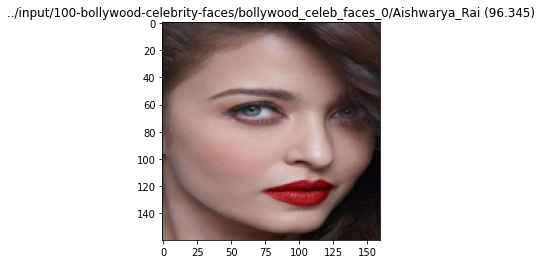

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan'] 
[ 1.42902174  0.89377808 97.09420157  0.12147128  0.46152733]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan


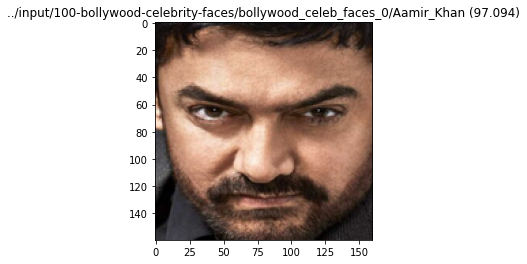

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan'] 
[ 3.52450306  1.7956681  91.62569455  0.67521398  2.37892031]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan


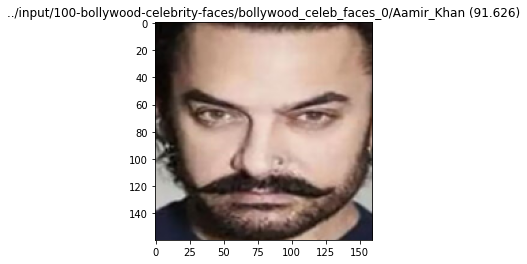

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan'] 
[ 1.48426903  1.12556052 96.23286748  0.52615609  0.63114688]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan


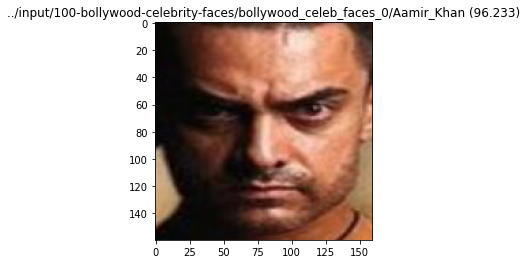

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh'] 
[98.0272622   0.65254982  0.50438212  0.19393861  0.62186725]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh


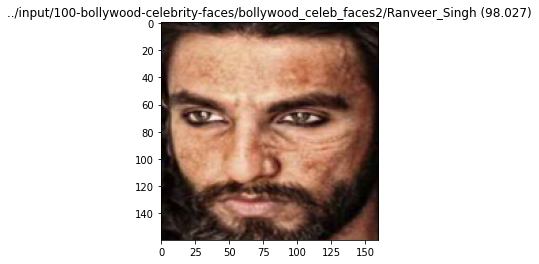

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai'] 
[ 0.78037627  3.11934941  0.27784173 94.89328282  0.92914977]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai


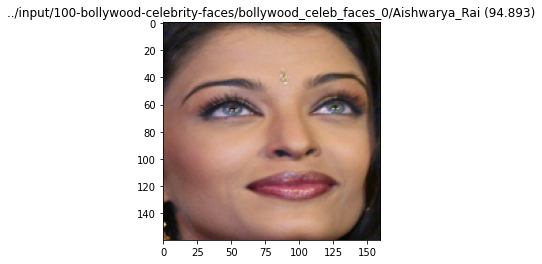

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh'] 
[91.54367047  2.34542148  5.45105449  0.12659109  0.53326248]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh


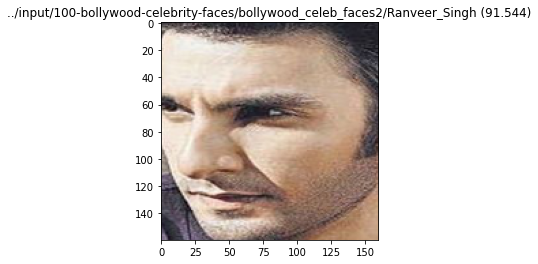

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai'] 
[ 0.35878682  2.08028028  0.22773459 96.12416672  1.2090316 ]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai


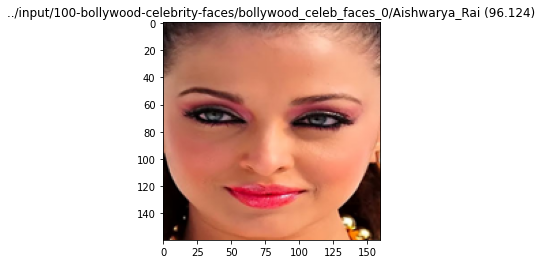

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai'] 
[ 0.35878682  2.08028028  0.22773459 96.12416672  1.2090316 ]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai


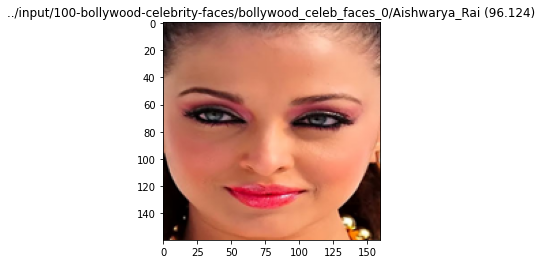

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan'] 
[ 0.4591117   0.48000367 98.49135694  0.27873449  0.29079319]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aamir_Khan


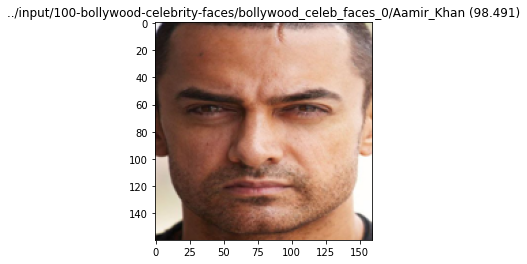

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai'] 
[ 0.48494653  0.88143808  0.51647284 96.64036157  1.47678098]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai


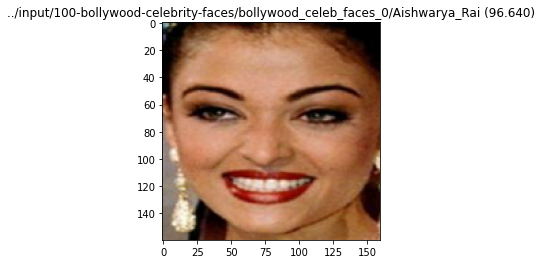

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai'] 
[ 0.55559494  7.57184034  0.25758349 90.95202305  0.66295818]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Aishwarya_Rai


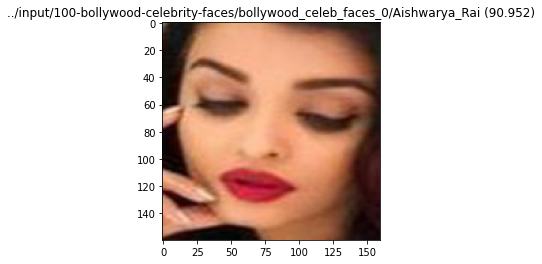

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh'] 
[97.5756069   1.13719186  0.48112968  0.18041966  0.62565191]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh


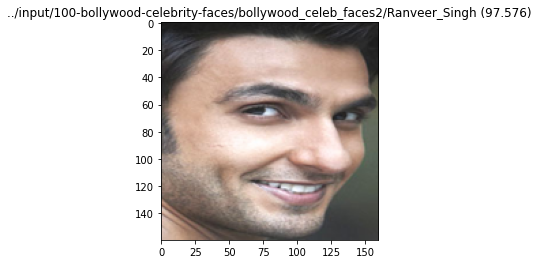

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh'] 
[95.90539763  2.71454051  0.3892546   0.68204006  0.3087672 ]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces2/Ranveer_Singh


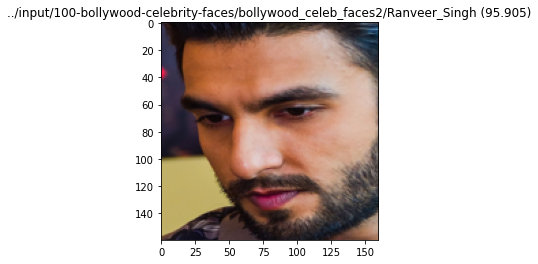

Predicted: 
['../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Hrithik_Roshan'] 
[ 1.76228651  2.75047585  0.29652399  0.63356931 94.55714433]
Expected: ../input/100-bollywood-celebrity-faces/bollywood_celeb_faces_0/Hrithik_Roshan


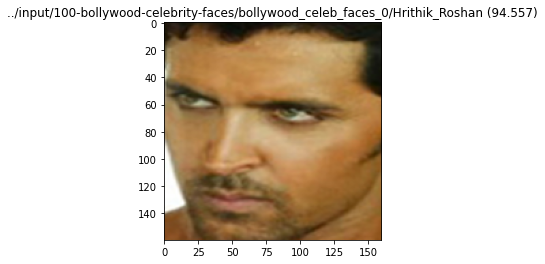

In [80]:
from random import choice
for j in range(0,15):
    selection = choice([i for i in range(X_test.shape[0])])
    random_face = X_test[selection]
    random_face_emd = emdTestX[selection]
    random_face_class = y_test_encoder[selection]
    random_face_name = out_encoder.inverse_transform([random_face_class])

    # prediction for the face
    samples = np.expand_dims(random_face_emd, axis=0)
    yhat_class = model.predict(samples)
    yhat_prob = model.predict_proba(samples)
    # get name
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class)

    #print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    print('Predicted: \n%s \n%s' % (predict_names, yhat_prob[0]*100))
    print('Expected: %s' % y_test[selection])
    # plot face
    plt.imshow(random_face)
    title = '%s (%.3f)' % (predict_names[0], class_probability)
    plt.title(title)
    plt.show()
